<a href="https://colab.research.google.com/github/bnv20/cakd3/blob/main/dl_object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Theory of object detection

https://velog.io/@qsdcfd/Theory-of-object-detection

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch

print("Torch version:{}".format(torch.__version__))
print("cuda version: {}".format(torch.version.cuda))
print("cudnn version:{}".format(torch.backends.cudnn.version()))

Torch version:1.13.1+cu116
cuda version: 11.6
cudnn version:8302


## YOLOv5

https://github.com/ultralytics/yolov5.git

In [ ]:
%cd /content
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -qr requirements.txt

import torch
from IPython.display import Image, clear_output

/content
Cloning into 'yolov5'...
remote: Enumerating objects: 15236, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 15236 (delta 6), reused 12 (delta 4), pack-reused 15218
Receiving objects: 100% (15236/15236), 14.17 MiB | 22.53 MiB/s, done.
Resolving deltas: 100% (10449/10449), done.
/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 31.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 75.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cvxpy 1.2.3 requires setuptools<=64.0.2, but you have setuptools 67.3.3 which is incompatible.


In [ ]:
%pip install -qr requirements.txt

conf_thres

https://lynnshin.tistory.com/48

## 특정 목적에 맞게 훈련하여 detecting

데이터셋 다운로드
- 데이터셋 : https://app.roboflow.com/ds/KkJD2PITV1?key=q49pZ24jum



In [ ]:
%mkdir /content/yolov5/detect
%cd /content/yolov5/detect

/content/yolov5/detect


In [ ]:
!pwd

/content/yolov5/detect


In [ ]:
# curl(client url) 명령어는 프로토콜들을 이용해 URL 로 데이터를 전송하여 서버에 데이터를 보내거나 가져올때 사용하기 위한 명령줄 도구 및 라이브러리이다
# -L 옵션: http위치 헤더를 따르기(리다이렉션을 따르도록 curl 을 사용할 수 있음)
!curl -L "https://app.roboflow.com/ds/KkJD2PITV1?key=q49pZ24jum" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   901  100   901    0     0   3850      0 --:--:-- --:--:-- --:--:--  3850
100 41.7M  100 41.7M    0     0  60.4M      0 --:--:-- --:--:-- --:--:-- 60.4M
Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/curve_synthesis_pattern1_1_jpg.rf.1d1ccaa08bfc2902ba9d1db11c68df4d.jpg  
 extracting: test/images/curve_synthesis_pattern1_1_jpg.rf.50c25d1e4e0d3e8e233e8272789ef06f.jpg  
 extracting: test/images/curve_synthesis_pattern1_1_jpg.rf.58ff95e608ed98c7c5dbf04bd0c9c488.jpg  
 extracting: test/images/curve_synthesis_pattern1_1_jpg.rf.f3525f609b368170ce04ce3b05be1f20.jpg  
 extracting: test/images/pattern_1-1-1-07-D_jpg.rf.18e46e3f62258dfda7d2039b4735167c.jpg  
 extracting: test/im

In [ ]:
!ls

data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


In [ ]:
from glob import glob # glob 모듈의 glob 함수는 사용자가 제시한 조건에 맞는 파일명을 리스트 형식으로 반환

train_img_list = glob('/content/yolov5/detect/train/images/*.jpg')
test_img_list= glob('/content/yolov5/detect/test/images/*.jpg')
valid_img_list = glob('/content/yolov5/detect/valid/images/*.jpg')
print(len(train_img_list), len(test_img_list),len(valid_img_list))

1748 128 256


In [ ]:
with open('/content/yolov5/detect/train.txt', 'w') as f:
  f.write('\n'.join(train_img_list)+'\n')

with open('/content/yolov5/detect/test.txt', 'w') as f:
  f.write('\n'.join(test_img_list)+'\n')

with open('/content/yolov5/detect/valid.txt', 'w') as f:
  f.write('\n'.join(valid_img_list)+'\n')

In [ ]:
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic # decorator
def writetemplate(line,cell):
  with open(line,'w') as f:
    f.write(cell.format(**globals()))

In [ ]:
import yaml
%cat /content/yolov5/detect/data.yaml

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 14
names: ['bdot', 'circle', 'curve', 'cut', 'cutoff', 'dcircle', 'dot', 'dsquare', 'fat', 'hcircle', 'out', 'scratch', 'short', 'thin']

roboflow:
  workspace: hyung-joong-kim-e8dti
  project: -3-44mlg
  version: 7
  license: CC BY 4.0
  url: https://universe.roboflow.com/hyung-joong-kim-e8dti/-3-44mlg/dataset/7

In [ ]:
!pwd

/content/yolov5/detect


In [ ]:
%%writetemplate /content/yolov5/detect/data.yaml
train: ./detect/train/images
test: ./detect/test/images
val: ./detect/valid/images

nc: 14
names: ['bdot', 'circle', 'curve', 'cut', 'cutoff', 'dcircle', 'dot', 'dsquare', 'fat', 'hcircle', 'out', 'scratch', 'short', 'thin']

In [ ]:
%cat /content/yolov5/detect/data.yaml

train: ./detect/train/images
test: ./detect/test/images
val: ./detect/valid/images

nc: 14
names: ['bdot', 'circle', 'curve', 'cut', 'cutoff', 'dcircle', 'dot', 'dsquare', 'fat', 'hcircle', 'out', 'scratch', 'short', 'thin']


In [ ]:
# 모델 구성
import yaml
with open('/content/yolov5/detect/data.yaml','r') as stream:
  num_classes = str(yaml.safe_load(stream)['nc'])

%cat /content/yolov5/models/yolov5l.yaml

# YOLOv5 🚀 by Ultralytics, GPL-3.0 license

# Parameters
nc: 80  # number of classes
depth_multiple: 1.0  # model depth multiple
width_multiple: 1.0  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]], 

In [ ]:
num_classes

'14'

In [ ]:
%%writetemplate /content/yolov5/models/custom_yolov5l.yaml

# Parameters
nc: {num_classes}  # number of classes
depth_multiple: 1.0  # model depth multiple
width_multiple: 1.0  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, C3, [256, False]],  # 17 (P3/8-small)

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, C3, [512, False]],  # 20 (P4/16-medium)

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, C3, [1024, False]],  # 23 (P5/32-large)

   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
  ]

In [ ]:
%cat /content/yolov5/models/custom_yolov5l.yaml


# Parameters
nc: 14  # number of classes
depth_multiple: 1.0  # model depth multiple
width_multiple: 1.0  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, C3, [256, Fal

In [ ]:
!pwd

/content/yolov5/detect


In [ ]:
#@title
%%time
%cd /content/yolov5
!python train.py --img 640 --batch 16 --epochs 1500 --data ./detect/data.yaml --cfg ./models/custom_yolov5l.yaml --weights '' --name detect_results --cache

/content/yolov5
train: weights=, cfg=./models/custom_yolov5l.yaml, data=./detect/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=1500, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=detect_results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-108-g4db6757 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4

In [ ]:
%load_ext tensorboard
%tensorboard --logdir runs

In [ ]:
!ls /content/yolov5/runs/train/detect_results/

confusion_matrix.png				    results.png
events.out.tfevents.1676938228.b97b97133da8.1442.0  train_batch0.jpg
F1_curve.png					    train_batch1.jpg
hyp.yaml					    train_batch2.jpg
labels_correlogram.jpg				    val_batch0_labels.jpg
labels.jpg					    val_batch0_pred.jpg
opt.yaml					    val_batch1_labels.jpg
P_curve.png					    val_batch1_pred.jpg
PR_curve.png					    val_batch2_labels.jpg
R_curve.png					    val_batch2_pred.jpg
results.csv					    weights


In [ ]:
# 검증
!python val.py --weights runs/train/detect_results/weights/best.pt --data ./detect/data.yaml --img 640 --iou 0.50 

val: data=./detect/data.yaml, weights=['runs/train/detect_results/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.5, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-108-g4db6757 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
custom_YOLOv5l summary: 267 layers, 46178283 parameters, 0 gradients, 107.9 GFLOPs
val: Scanning /content/yolov5/detect/valid/labels.cache... 256 images, 73 backgrounds, 0 corrupt: 100% 256/256 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 8/8 [00:12<00:00,  1.50s/it]
                   all        256        489      0.882      0.907      0.925       0.54
                  bdot        256          2      0.827          1      0.995      0.647
          

In [ ]:
!pwd

/content/yolov5


In [ ]:
%%writetemplate /content/yolov5/detect/data.yaml
train: ./detect/train/images
test: ../drive/MyDrive/KDT/3차_프로젝트_반도체AI검출시스템/3차_project_AI반도체품질검출시스템/test_images
val: ./detect/valid/images

nc: 14
names: ['bdot', 'circle', 'curve', 'cut', 'cutoff', 'dcircle', 'dot', 'dsquare', 'fat', 'hcircle', 'out', 'scratch', 'short', 'thin']

In [ ]:
# --task 설정 안해주면 default롤 'val'이 적용된다.
!python val.py --weights runs/train/detect_results/weights/best.pt --data ./detect/data.yaml --img 640 --task test

val: data=./detect/data.yaml, weights=['runs/train/detect_results/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-108-g4db6757 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
custom_YOLOv5l summary: 267 layers, 46178283 parameters, 0 gradients, 107.9 GFLOPs
test: Scanning /content/drive/.shortcut-targets-by-id/1iZXRDgGYOuoYTzFQq9hJg05-hZi2Tx21/3차_project_AI반도체품질검출시스템/test_images... 0 images, 142 backgrounds, 0 corrupt: 100% 142/142 [00:20<00:00,  7.00it/s]
test: WARNING ⚠️ No labels found in /content/drive/.shortcut-targets-by-id/1iZXRDgGYOuoYTzFQq9hJg05-hZi2Tx21/3차_project_AI반도체품질검출시스템/test_images.cache. See https://github.com/ultralytics/yolov5/wiki/Train-Custom-Data
test: New cache cre

### detect

In [ ]:
!python detect.py --weights runs/train/detect_results/weights/best.pt --img 640 --conf 0.55 --source ../drive/MyDrive/KDT/3차_프로젝트_반도체AI검출시스템/3차_project_AI반도체품질검출시스템/test_images

detect: weights=['runs/train/detect_results/weights/best.pt'], source=../drive/MyDrive/KDT/3차_프로젝트_반도체AI검출시스템/3차_project_AI반도체품질검출시스템/test_images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.55, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-108-g4db6757 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
custom_YOLOv5l summary: 267 layers, 46178283 parameters, 0 gradients, 107.9 GFLOPs
image 1/142 /content/drive/.shortcut-targets-by-id/1iZXRDgGYOuoYTzFQq9hJg05-hZi2Tx21/3차_project_AI반도체품질검출시스템/test_images/img1-gray.jpg: 640x640 (no detections), 52.6ms
image 2/142 /content/drive/.shortcut-targets-by-id/1iZXRDgGYOuoYT

In [ ]:
import glob
import random
from IPython.display import Image, display

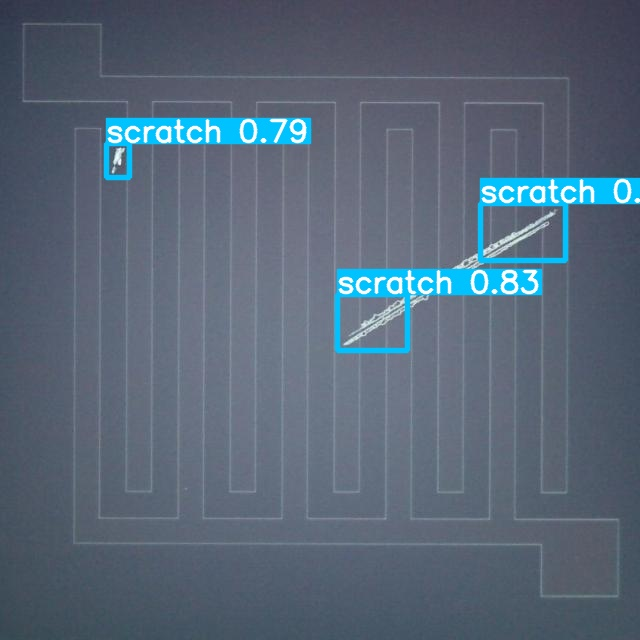

In [ ]:
image_name = random.choice(glob.glob('/content/yolov5/runs/detect/exp2/*.jpg')) # glob로 경로를 묶어준다
display(Image(filename=image_name))

In [ ]:
# 모델 내보내기
# %mkdir /content/drive/MyDrive/colab_lecture/강의/pothole
%cp /content/yolov5/runs/train/detect_results/weights/best.pt /content/drive/MyDrive/KDT/3차_프로젝트_반도체AI검출시스템/3차_project_AI반도체품질검출시스템/YOLOv5l_best_230220.pt